# Chapter 2. Data and Sampling Distribution

La estadística tradicional se enfoca más en la población, mientras que la moderna trabaja principalmente con muestras. El autor menciona que un científico de datos debe enfocarse en la muestra.

---

In [1]:
import pandas as pd
import numpy as np
import random

## Muestreo aleatorio y errores aleatorios

### Muestra aleatoria:
Se extraen elementos de la población, en donde cada elemento tiene la misma probabilidad de ser elegido:
- con reemplazo: cada elemento elegido se regresa a la población.
- sin reemplazo los elementos elegidos se van excluyendo del sampleo.

El resultado de este muestreo es llamado 'muestra aleatoria simple'

_<font color=red>¿Crees que los reviews de restaurantes, bares, antros, lugares públicos en general, contienen reviews 'representativos'? Lo más seguro es que no. Ya que las personas que realizan estas críticas son aquellos que tienen alguna relación con los lugares. Malas experiencias, o conocidos ahí a los cuales les beneficiaría recibir críticas positivas (como Song Shan). Lo mejor sería elegir a las personas completamente aleatorio.</font>_

### Sezgos/Bias
Son errores derivados del sampleo aleatorio o las mediciones hechas. Se tiene que recordar que, al final de cuentas, un modelo va arrojar sus resultados basados en la muestra. Entonces, si quieres obtener el promedio de calificaciones de toda una universidad y en tu muestra estan los alumnos con mejores calificaciones, esto no mostrará la realidad.

O también, quieres mapear las zonas en donde hay más actividad eléctrica dentro del hipocampo de una rata, pero el medidor esta averiado y gran parte de la actividad la toma solo de un lado, esto sería un error, un sezgo.

### Selección aleatoria
¿Cómo le hacemos para elegir una muestra representativa? Por ejmeplo, tratando de entender nuestro cliente ITAMITA:
1. Entender nuestro target, y la manera en la que elegimos nuestra muestra: ¿Son todos los alumnos? ¿O solo los que cursan los últimos semestres? ¿O solo los que llevan clases vespertinas? ¿O son aquellos que no son vegetarianos? ¿Serán los más sociables? ETC.

_**Muestreo estratificado**: se generan grupos en la población con distintas características, para luego realizar muestreos aleatorios. Esto funciona cuando un encuestador político, por ejemplo, quiere conocer la opinión de los blancos, negros, latinos, asiáticos, etc..._

### Tamaño vs Calidad: cuándo el tamaño tiene más peso?
Acá se menciona el caso del auto-complete search, el cuál, entre más información tenga, mejor podrá predecir qué es lo que quiere encontrar la persona que busca.

## Sezgos de selección

Acá se menciona el _**vast search effect**_, un termino acuñado por John Elder, el cual dice que, si se realizan muchos experimentos con diferentes hipótesis y diferentes muestreos, seguramente vas a encontrar algo interesante. Pero, ¿es acaso significativo esto? 

Para reforzar esto, el autor menciona el ejemplo de tirar una moneda 10 veces y ver si cae 'cara' las 10 veces. La probabilidad que eso pase cuando una persona lo hace es de 1 en 1000 (si pasaría, sería algo extraordinario), en cambio, la probabilidad de que esto pase si 20,00 personas lo hacen al mismo tiempo es 99%. Por lo tanto, no sería significativo. Acá es donde puede ocurrir un sezgo: _vast search effect_

Otras formas de sezgos de seleccion:
- sampleo no-aleatorio.
- cherry-picking data: escoger los datos de manera específica para obtener un resultado.
- elegir los datos dentro de un periodo de tiempo, en donde el efecto se manifiesta de manera particular.
- detener el experimento cuando el resultado es interesante.

#### Regresión a la media
Medición excesiva de una variable. Osea, solo ver los puntos en donde el valor de una variable es excesivo, y por lo tanto, a través del tiempo esto no sera igual siempre, va regresasr a la media tarde o temprano.

Por ejemplo, el 'rookie of the year': Este personaje se compone de su habilidad y suerte durante la temporada que fue galardonado, sin embargo, la siguiente temporada es muy probable que siga teniendo su habilidad, pero no la misma suerte. O también, los hijos de personas muy altas. Estos chamacos tienden a ser más chaparros cuando sus padres son más altos que la media, por otro lado, los hijos que resultan ser más altos que sus padres, son aquellos que sus padres miden por debajo de la media. Es decir, esta teoría rechaza que 'entre más alto el padre, más alto será el hijo', o, 'hoy fui rookie of the year, mi habilidad es enorme y seguire siendolo unos 3 años más porque estoy a tope', NO, porque la suerte seguramente no será la misma. Las cosas cambian.

Autor de la teoría: Francis Galton

## Distribución de muestreo de una estadística
Es clave la manera en la que seleccionas tu muestra. Esto determinara la distribución de esos datos.

In [2]:
df = pd.read_csv("D:/Documentos/Python for Data Projects/datos_practical_statistics/loans_income.csv")

In [5]:
df.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


#### Ejemplo:
1. Selección aleatoria de 1,000 valores.
2. Coje 1,000 veces 5 valores aleatorios y saca su promedio.
3. Coje 1,000 veces 20 valores aleatorios y saca su promedio.

In [3]:
#1.-
x1 = df.sample(1000)
x1.shape

(1000, 1)

In [36]:
#2.-
x2=[]
for i in range(1000):
    x = df.sample(5)
    x = x.to_numpy()
    s = sum(x)
    avg = s/5
    x2.append(avg)

In [2]:
#len(x2),x2

In [52]:
#3.-
x3=[]
for i in range(1000):
    x = df.sample(100)
    x = x.to_numpy()
    s = sum(x)
    avg = s/100
    x3.append(avg)

In [3]:
#len(x3),x3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B28E5B19E8>]],
      dtype=object)

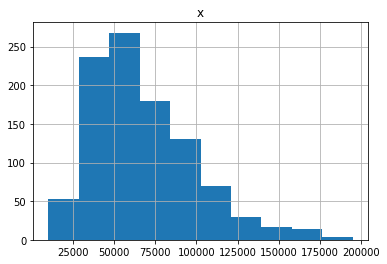

In [46]:
x1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B28E659B70>]],
      dtype=object)

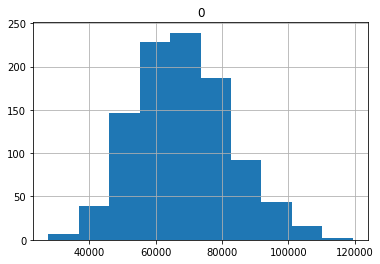

In [47]:
pd.DataFrame(x2).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B28E78D240>]],
      dtype=object)

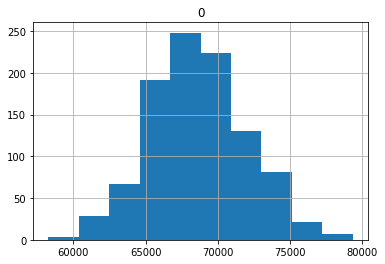

In [53]:
pd.DataFrame(x3).hist()

Acá se ve cómo el promedio de varias muestras hace que el histograma se vaya haciedno más estrecho. Entre más valores tomen en cuenta tus promedios, más estrecho se hará el histograma.
"The	distribution	of	a	sample	statistic	such	as	the	mean	is	likely	to	be	more	regular and	bell-shaped	than	the	distribution	of	the	data	itself"

### Teorema de límite central

Este teorema se puede observar en el ejemplo anterior, y es que estipula que las medias tomadas de distintas muestras, van a distribuirse normalmente, aun cuando la población no se distribuya de esta manera. Una condición para esto es que la muestra no sea muy chica, osea, no se mame... y que el alejamiento de los valores de la muestra hacía la normalidad, no sea muy grande (creo que es difícil que una muestra aleatoria resulte en puros outliers, por ejemplo, para que no pueda formar una normal).

Este teorema permite aplicar fórmulas basadas en una distribución normal, como t-distribution. Es decir, realizar pruebas de hipótesis, sacar intervalos de confianza. Aun así, esto es para los estadísticos formalmente, los científicos de datos no utilizan tanto esto.

### Error estándar/Standard error
Es una métrica que resume la variabilidad de una muestra __para un estadístico(media). Se calcula con base a la desviación estándar__.
A medida de que el tamaño de la muestra sube, el error disminuye, así como el teorema central del límite lo evidencia.
"The	relationship	between	standard	error	and	sample size	is	sometimes	referred	to	as	the	square-root	of	n	rule:	in	order	to	reduce	the standard	error	by	a	factor	of	2,	the	sample	size	must	be	increased	by	a	factor	of	4."

In [36]:
#Paso #1
x1=[]
for i in range(1000):
    x = df.sample(1000)
    x = x.to_numpy()
    s = sum(x)
    avg = s/1000
    x1.append(int(avg))
x1=pd.DataFrame(x1)    

In [37]:
x2=[]
for i in range(1000):
    x = df.sample(2000)
    x = x.to_numpy()
    s = sum(x)
    avg = s/2000
    x2.append(int(avg))
x2=pd.DataFrame(x2)

In [38]:
x3=[]
for i in range(1000):
    x = df.sample(4000)
    x = x.to_numpy()
    s = sum(x)
    avg = s/4000
    x3.append(int(avg))
x3=pd.DataFrame(x3)    

In [40]:
#Paso #2 y #3
se1 = x1.std()/np.sqrt(1000)
se1

0    32.843543
dtype: float64

In [41]:
se2 = x2.std()/np.sqrt(2000)
se2

0    16.078627
dtype: float64

In [42]:
se3 = x3.std()/np.sqrt(4000)
se3

0    7.935188
dtype: float64

Se cumple la teoría del error estándar, pero esta práctica no es confiable. Para ello, existe Bootstrap

#### Nota:
- Do	not	confuse	standard	deviation	(which	measures	the	variability	of	individual	data	points)	with standard	error	(which	measures	the	variability	of	a	sample	metric).


### Bootstrap
De una muestra se generan otras muestras, con reemplazo, n veces. De esta manera vas a tener como resultado una muestra más grande generada a partir de tu muestra original. Lo que cambia acá es que no hay asunciones sobre si la distribución de los datos será normal.

In [43]:
#Utilizaré la misma función que hice antes, solo que activare el reemplazo:
#Paso #1
x1=[]
for i in range(1000):
    x = df.sample(1000,replace=True)
    x = x.to_numpy()
    s = sum(x)
    avg = s/1000
    x1.append(int(avg))
x1=pd.DataFrame(x1)

In [44]:
x2=[]
for i in range(1000):
    x = df.sample(2000,replace=True)
    x = x.to_numpy()
    s = sum(x)
    avg = s/2000
    x2.append(int(avg))
x2=pd.DataFrame(x2)

In [45]:
x3=[]
for i in range(1000):
    x = df.sample(4000,replace=True)
    x = x.to_numpy()
    s = sum(x)
    avg = s/4000
    x3.append(int(avg))
x3=pd.DataFrame(x3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000155A66899B0>]],
      dtype=object)

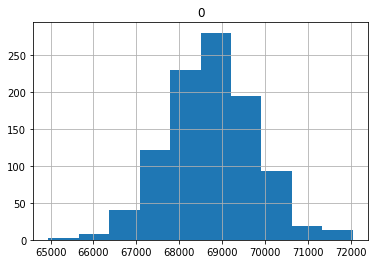

In [46]:
x1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000155A6A0B2E8>]],
      dtype=object)

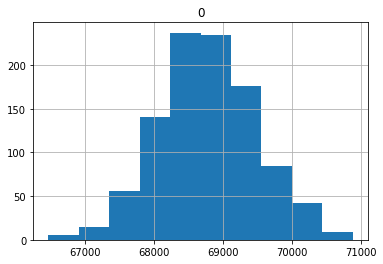

In [47]:
x2.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000155A6A0B978>]],
      dtype=object)

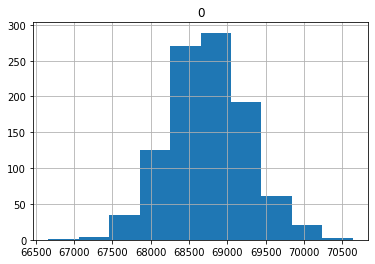

In [48]:
x3.hist()

#### Qué hace bootstrap?
It	merely	informs	us	about	how	lots	of	additional	samples would	behave	when	drawn	from	a	population	like	our	original	sample.

### Resampleo vs Bootstrap / Resampling vs Bootstrapping

Estos términos se usan como sinónimos a veces, pero en realidad, son diferentes. El resampleo es combinar varias muestras y hacer el sampleo (generar tu muestra final) sin reemplazo.

### Intervalos de confianza
Esta es otra métrica que sirve para estimar el error en una muestra. El intervalo de confianza nos dice que un 'x%' de una métrica(media) sacada de una muestra, en promedio, contendra esas métricas x% de las ocasiones.
"it	is	the	interval	that	encloses	the	central	90%	of	the	__bootstrap	sampling distribution__	of	a	sample	statistic."

- NO ES LA PROBABILIDAD DE QUE LOS VALORES REALES ESTARAN EN EL INTERVALO.
- Es más esto: 	“Given	a sampling	procedure	and	a	population,	what	is	the	probability	that…”	To	go	in	the	opposite direction,	“Given	a	sample	result,	what	is	the	probability	that	(something	is	true	about	the population),”	involves	more	complex	calculations	and	deeper	imponderables.

https://towardsdatascience.com/how-confidence-and-prediction-intervals-work-4592019576d8

https://medium.com/@bhupenderair/confidence-intervals-simple-explanation-167e12143ed9 !!!!!!
- Se utiliza t-student cuando no sabes la media o varianza de la población.
- Se utiliza z-score cuando conoces la media o varianza de la P.

### Distribición normal/Normal distribution
El hecho de que la mayoría de las distribuciones de los datos de sampleos sea de manera normal, ha permitido la generación de varios cálculos estadísticos. Es importante recalcar que, esta generalidad de distribución solo ocurre en los sampleos y no en las poblaciones.
- 68% de los datos existe a 1 desviación estandar de la media.
- 95% a 2 desviaciones y,
- 99.7% a 3.

#### Normal estandar y qqplot / Standard	Normal	and	QQ-Plots 
Las QQ-Plots sirven para ver si nuestros datos estan distribuidos de cierta manera, por ejemplo, normal.

In [3]:
# ejemplo de unos datos distribuidos normalmente
normal=[np.random.normal() for i in range(1000)]

In [4]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

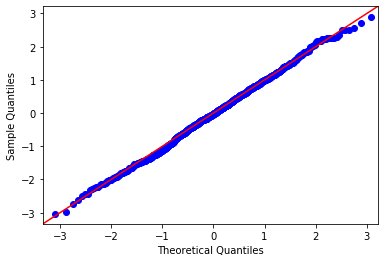

In [6]:
# Create QQ plot
sm.qqplot(np.array(normal), line='45')
plt.show()

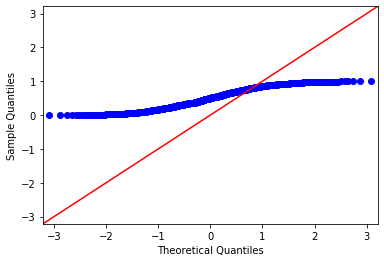

In [27]:
# ahora creando un ejemplo con datos distribuidos no-normalmente
import random# Generate some uniformly distributed random variables
random_uniform = [random.random() for i in range(1000)]# Create QQ plot
sm.qqplot(np.array(random_uniform), line='45')
plt.show()

In [26]:
#???? me estoy haciendo mucho bolas.
#dejo aca este link donde hay guias de ver si una distribución es normal, no solo con qq-plots:
#https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9

#### Long-tail distribution

In [28]:
df = pd.read_csv("D:/Documentos/Python for Data Projects/datos_practical_statistics/sp500_data.csv")

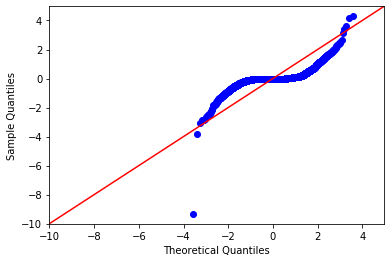

In [31]:
sm.qqplot(np.array(df.NFLX), line='45')
plt.show()

#### t-distribution o t-student
Tiene una formal normal pero más picuda en el medio y con colas más largas

__Nota__:
What	do	data	scientists	need	to	know	about	the	t-distribution	and	the	central	limit	theorem?	Not	a whole	lot.	These	distributions	are	used	in	classical	statistical	inference,	but	are	not	as	central	to the	purposes	of	data	science.	Understanding	and	quantifying	uncertainty	and	variation	are important	to	data	scientists,	but	empirical	bootstrap	sampling	can	answer	most	questions	about sampling	error.	However,	data	scientists	will	routinely	encounter	t-statistics	in	output	from statistical	software	and	statistical	procedures	in	R,	for	example	in	A-B	tests	and	regressions,	so familiarity	with	its	purpose	is	helpful.


#### binomial
Yes/no	(binomial)	outcomes	lie	at	the	heart	of	analytics	since	they	are	often	the culmination	of	a	decision	or	other	process;	buy/don’t	buy,	click/don’t	click, survive/die,	and	so	on.	Central	to	understanding	the	binomial	distribution	is	the idea	of	a	set	of	trials,	each	trial	having	two	possible	outcomes	with	definite probabilities.

#### poisson
para estimar el numero de eventos 'x' que van a ocurrir en cierto tiempo

rpois(100,	lambda	=	2)
This	code	will	generate	100	random	numbers	from	a	Poisson	distribution	with	=	2.	For	example,	if	incoming	customer	service	calls	average	2	per	minute,	this code	will	simulate	100	minutes,	returning	the	number	of	calls	in	each	of	those	100 minutes.

_hay otras 3 distribuciones más que no vi, dejo esta nota para estar consciente de esto_